In [1]:
import pandas as pd

# Load datasets
student_mat = pd.read_csv('student-mat.csv', sep=';')
student_por = pd.read_csv('student-por.csv', sep=';')

# Combine datasets
students = pd.concat([student_mat, student_por]).drop_duplicates()


In [2]:
# Encode categorical features
students = pd.get_dummies(students, drop_first=True)

# Features and target
X = students.drop(['G3'], axis=1)
y = students['G3']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


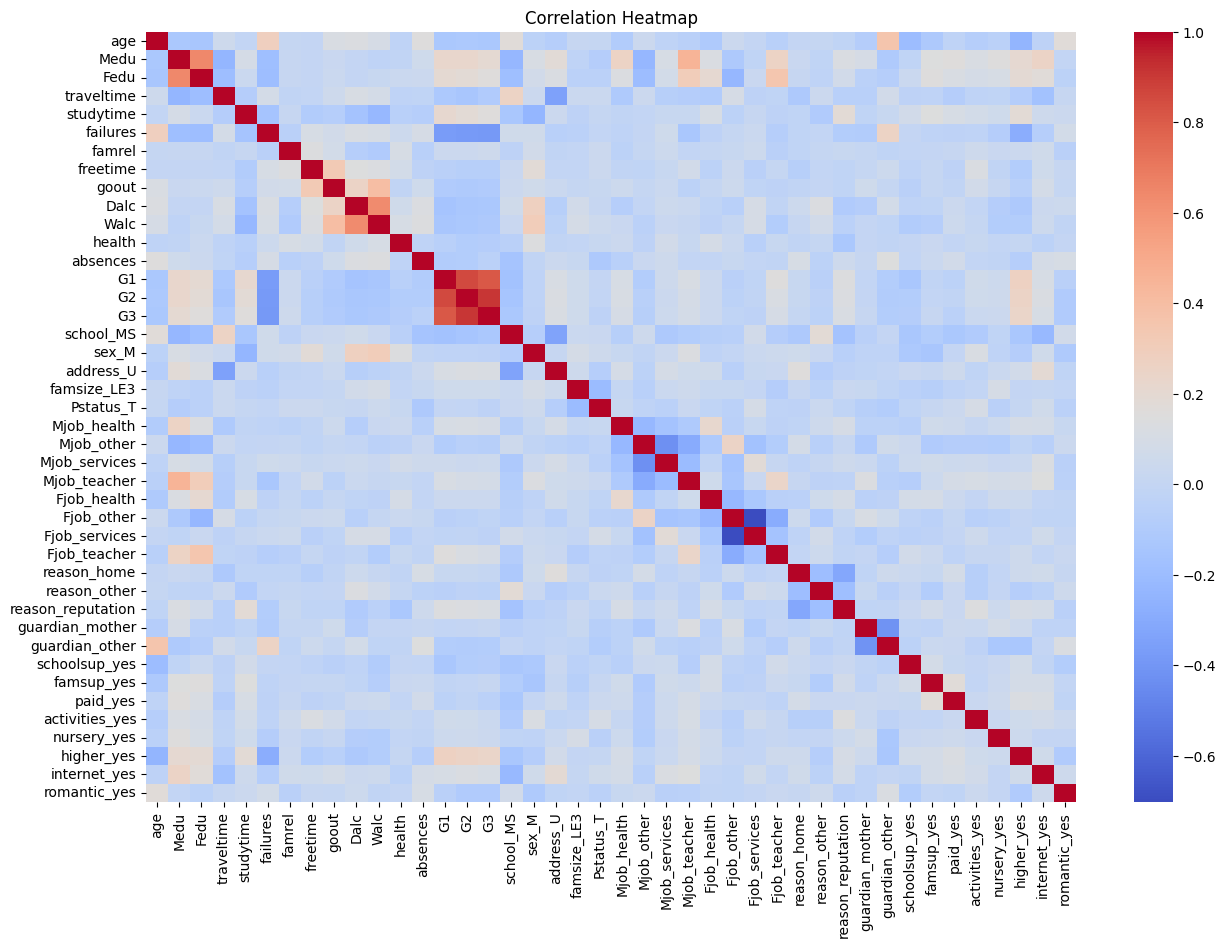

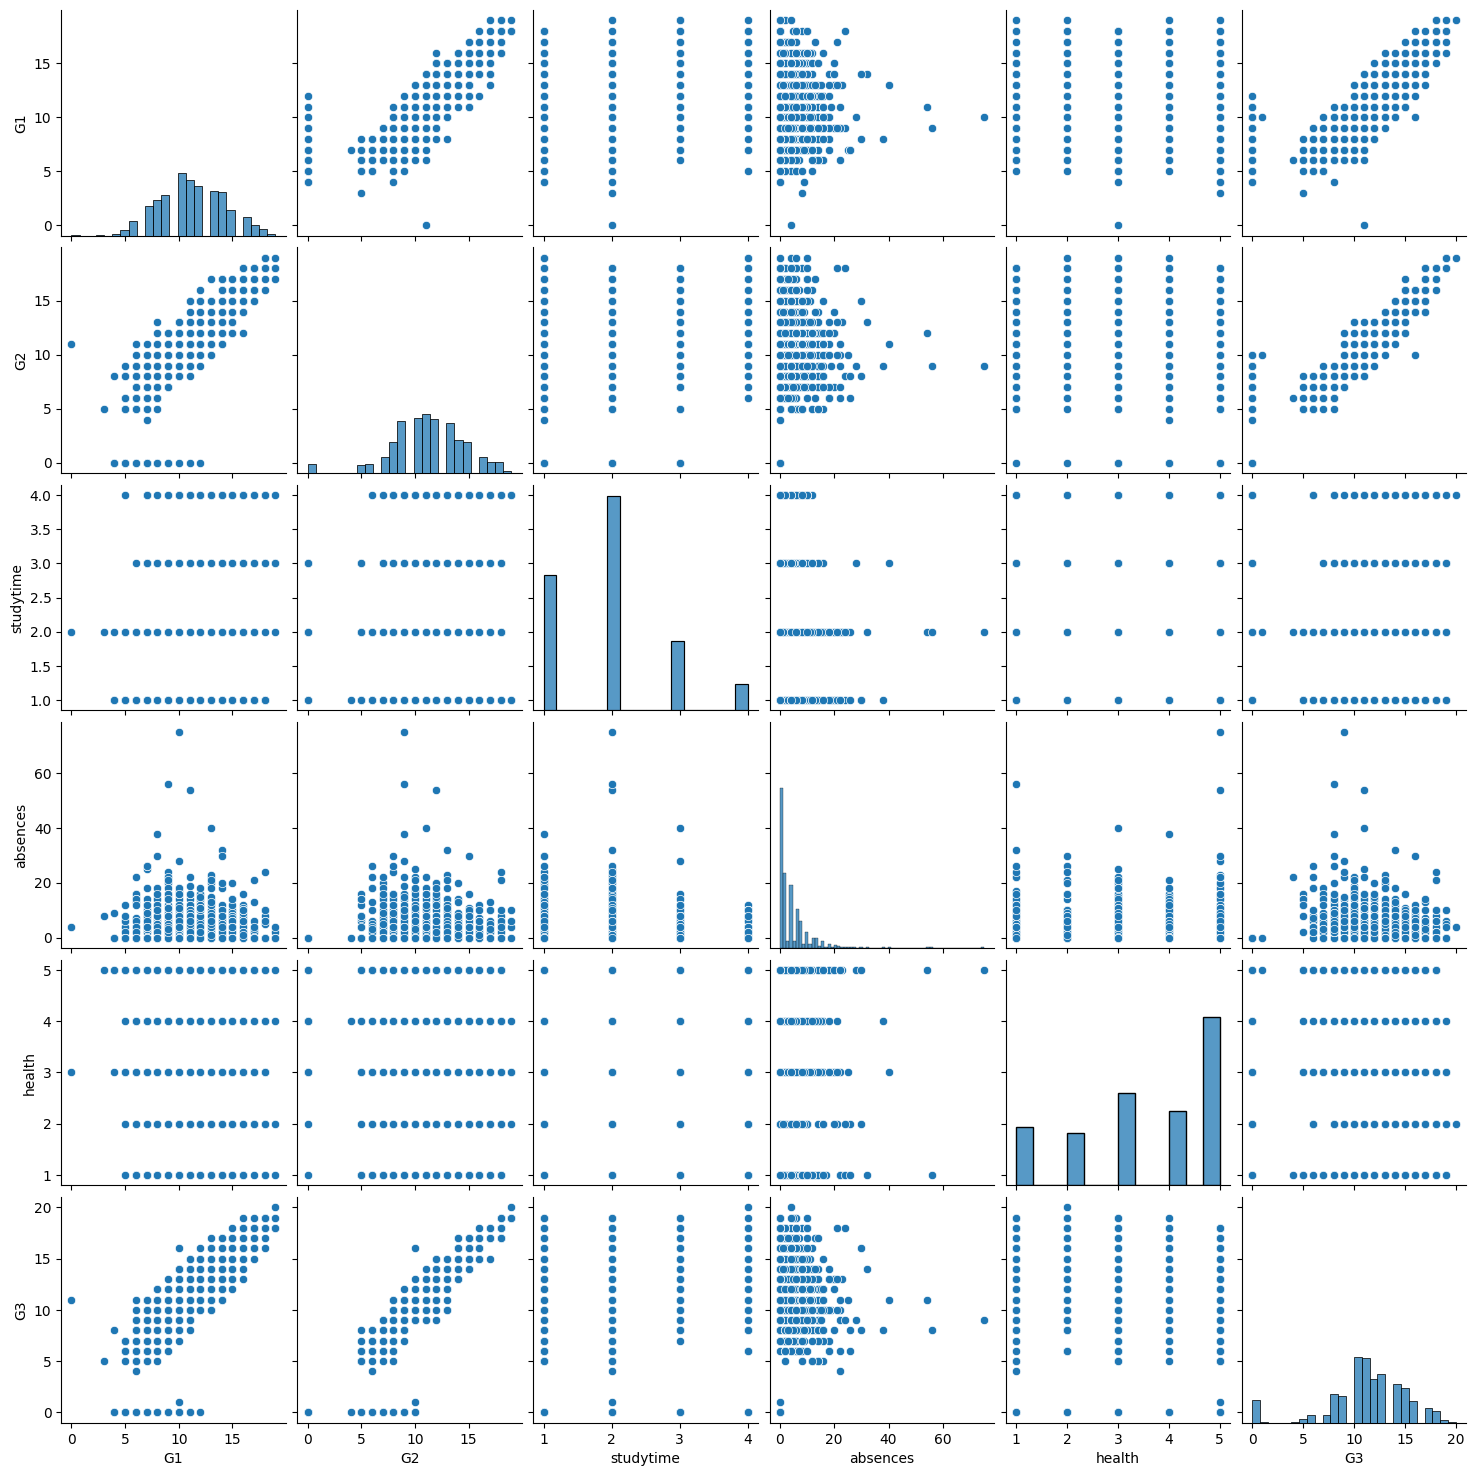

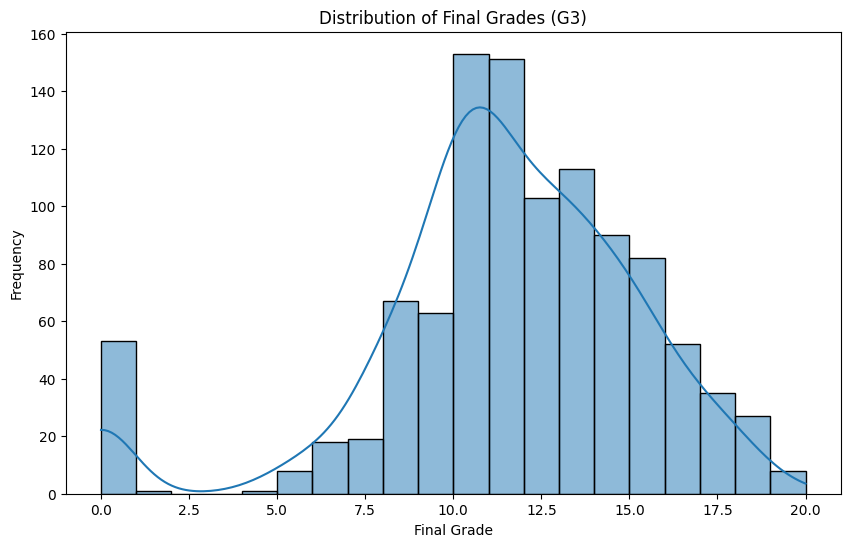

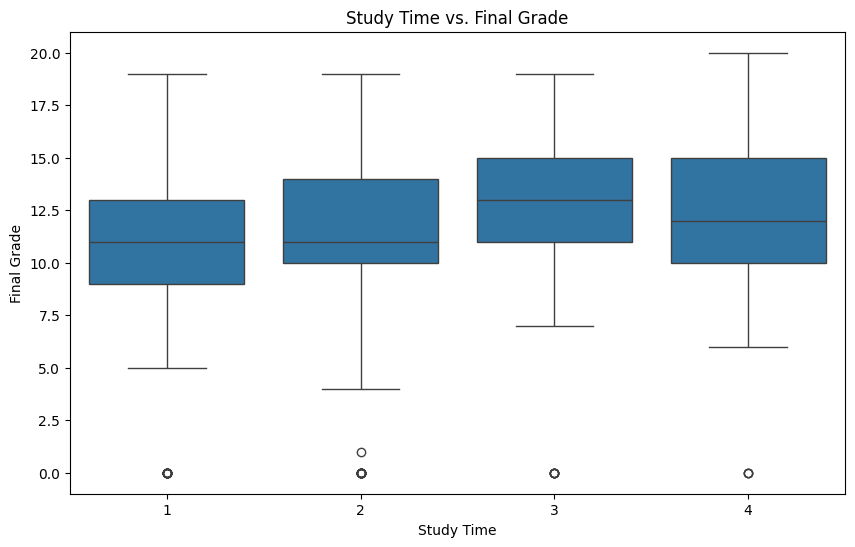

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(students.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of selected features
selected_features = ['G1', 'G2', 'studytime', 'absences', 'health', 'G3']
sns.pairplot(students[selected_features])
plt.show()

# Distribution of final grades
plt.figure(figsize=(10, 6))
sns.histplot(students['G3'], kde=True, bins=20)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

# Boxplot for studytime vs. final grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=students)
plt.title('Study Time vs. Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Accuracy and error percentage
accuracy = r2 * 100
error_percentage = (1 - r2) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(f'Error Percentage: {error_percentage:.2f}%')


Mean Absolute Error: 0.9629414445203919
Mean Squared Error: 2.912186042622791
Root Mean Squared Error: 1.7065128310747595
R^2 Score: 0.8116408844562089
Accuracy: 81.16%
Error Percentage: 18.84%
